# Most Valuable Soccer Teams in the World

Analysing and visualizing the most valuable teams in the world in 2023 - 2024
## Data
The data is sourced from the [Sportico](https://www.sportico.com/feature/soccer-teams-football-club-ranking-list-1234721408/)
---

**Author Information:**

- **Name:** Brian Koech
- **Email:** info@libranconsult.com
- **GitHub:** [brightmaraba](https://github.com/brightmaraba)
- **Twitter:** [@LibranTechie](https://twitter.com/librantechie)


In [57]:
# Import required modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('../styles/plotstyle.mplstyle') # Use custom style

# Remove warnings
import warnings

warnings.filterwarnings("ignore")

In [58]:
%matplotlib inline

In [59]:
# set the directories
base_path = os.path.dirname(os.path.realpath("__file__"))
root_path = os.path.join(base_path, "..")
data_path = os.path.join(root_path, "data")
images_path = os.path.join(root_path, "images")


In [60]:
# Load the data
club_data_csv = f'{data_path}/fc_valuations/fc_valuations.csv'
club_data_df = pd.read_csv(club_data_csv)
club_data_df.head()


,Rank,Team,"2024 Valuation [Millions, Dollars]","2022-23 Revenue [Millions, Dollars]",League
0,1,Manchester United,6200,778,EPL
1,2,Read Madrid,6060,844,LaLiga
2,3,FC Barcelona,5280,836,LaLiga
3,4,Liverpool,5110,713,EPL
4,5,Bayern Munich,4800,781,Bundesliga


#### Data Preparation
Data cleaning, also known as data cleansing or scrubbing, is the process of identifying and correcting (or removing) corrupt, inaccurate, or irrelevant records from a dataset. It's an essential step in the data preparation process, ensuring that data is accurate, consistent, and usable for analysis or modeling. Issies to be addressed may include but not limited to the following:
- Remove duplicates
- Clean the data
- Handle missing values

In [61]:
#Checking for missing values
missing_values = club_data_df.isnull().sum()
missing_values # No missing values

Rank                                   0
Team                                   0
2024 Valuation [Millions, Dollars]     0
2022-23 Revenue [Millions, Dollars]    0
League                                 0
dtype: int64

In [62]:
# Check for duplicates in the dataset Team columns
duplicate_team_entry = club_data_df[club_data_df.duplicated(subset="Team", keep=False)]
duplicate_team_entry # No duplicate entries

,Rank,Team,"2024 Valuation [Millions, Dollars]","2022-23 Revenue [Millions, Dollars]",League


#### Exploratory Data Analysis [EDA]

- Exploratory Data Analysis (EDA) is a process used in statistics and data science to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.
- It enables one to understand the data’s underlying patterns, spot anomalies, test a hypothesis, or check assumptions with the help of summary statistics and graphical representations.
- EDA is a crucial step before formal modeling or hypothesis testing, providing a context for developing more precise questions and choosing appropriate techniques for further analysis.


##### Step 1: Descriptive Statistics

In [63]:
# Describe the data
summary_stats = club_data_df.describe()
summary_stats

,Rank,"2024 Valuation [Millions, Dollars]","2022-23 Revenue [Millions, Dollars]"
count,50.00000,50.000000,50.000000
mean,25.50000,1591.060000,291.220000
std,14.57738,1652.935069,259.365733
min,1.00000,550.000000,51.000000
25%,13.25000,646.250000,77.500000
50%,25.50000,745.000000,205.500000
75%,37.75000,1515.000000,411.750000
max,50.00000,6200.000000,855.000000


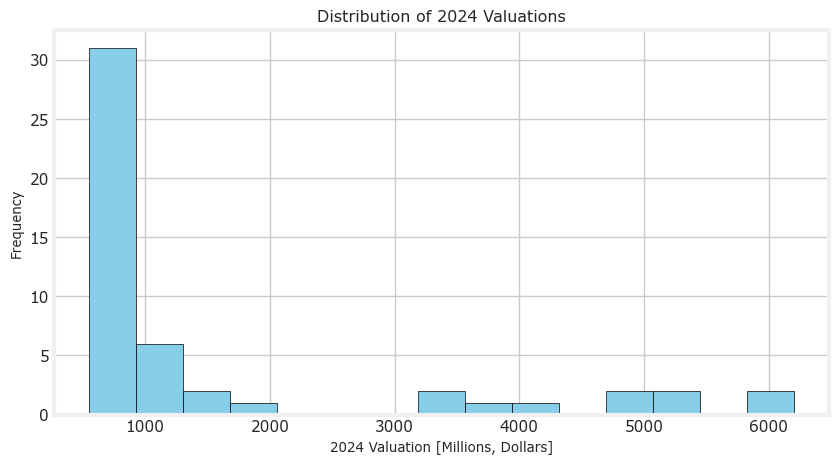

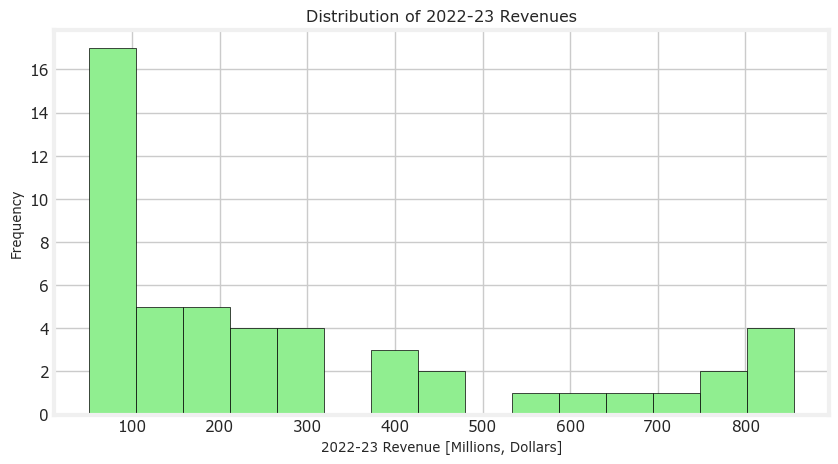

<Figure size 1200x600 with 0 Axes>

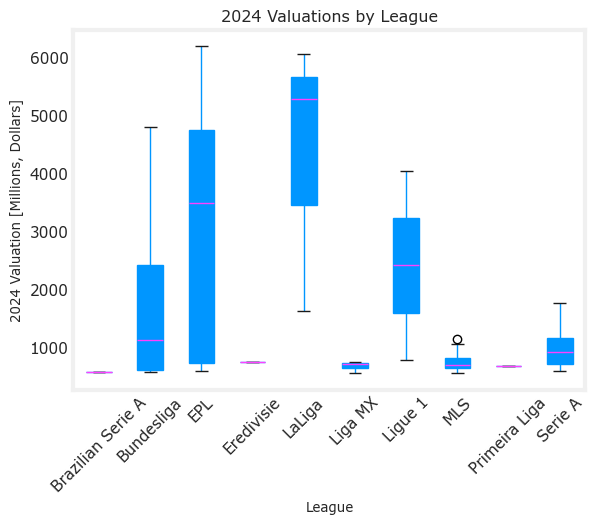

<Figure size 1200x600 with 0 Axes>

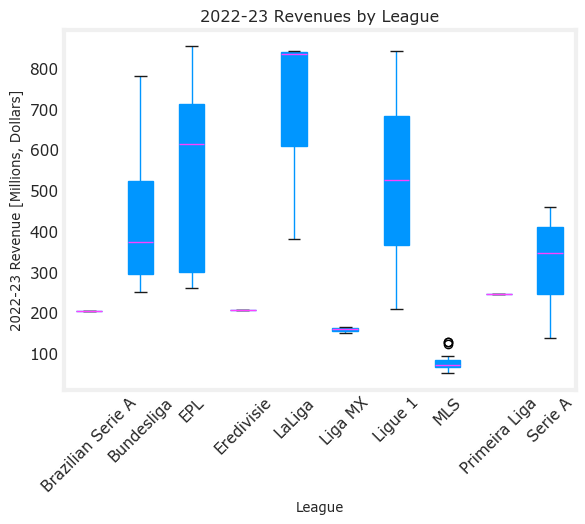

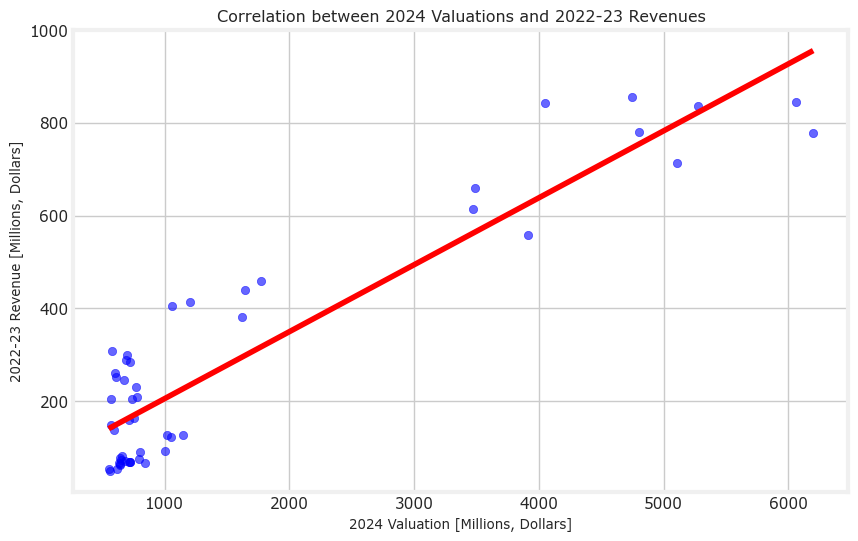

,"2024 Valuation [Millions, Dollars]","2022-23 Revenue [Millions, Dollars]"
"2024 Valuation [Millions, Dollars]",1.000000,0.918135
"2022-23 Revenue [Millions, Dollars]",0.918135,1.000000


In [64]:
# Distribution and Correlation (Valuatiation v 2022-2023 Revenue)
import matplotlib.pyplot as plt

# Plot distribution of 2024 valuations
plt.figure(figsize=(10, 5))
plt.hist(
    club_data_df["2024 Valuation [Millions, Dollars]"],
    bins=15,
    color="skyblue",
    edgecolor="black",
)
plt.title("Distribution of 2024 Valuations")
plt.xlabel("2024 Valuation [Millions, Dollars]")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot distribution of 2022-23 revenues
plt.figure(figsize=(10, 5))
plt.hist(
    club_data_df["2022-23 Revenue [Millions, Dollars]"],
    bins=15,
    color="lightgreen",
    edgecolor="black",
)
plt.title("Distribution of 2022-23 Revenues")
plt.xlabel("2022-23 Revenue [Millions, Dollars]")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# League-wise distribution of 2024 valuations
plt.figure(figsize=(12, 6))
club_data_df.boxplot(
    column="2024 Valuation [Millions, Dollars]",
    by="League",
    grid=False,
    patch_artist=True,
)
plt.title("2024 Valuations by League")
plt.suptitle("")
plt.xlabel("League")
plt.ylabel("2024 Valuation [Millions, Dollars]")
plt.xticks(rotation=45)
plt.show()

# League-wise distribution of 2022-23 revenues
plt.figure(figsize=(12, 6))
club_data_df.boxplot(
    column="2022-23 Revenue [Millions, Dollars]",
    by="League",
    grid=False,
    patch_artist=True,
)
plt.title("2022-23 Revenues by League")
plt.suptitle("")
plt.xlabel("League")
plt.ylabel("2022-23 Revenue [Millions, Dollars]")
plt.xticks(rotation=45)
plt.show()

# Plot scatter plot to show correlation between 2024 valuations and 2022-23 Revenues
plt.figure(figsize=(10, 6))
plt.scatter(
    club_data_df["2024 Valuation [Millions, Dollars]"],
    club_data_df["2022-23 Revenue [Millions, Dollars]"],
    color="blue",
    alpha=0.6,
)
plt.title("Correlation between 2024 Valuations and 2022-23 Revenues")
plt.xlabel("2024 Valuation [Millions, Dollars]")
plt.ylabel("2022-23 Revenue [Millions, Dollars]")
plt.grid(True)

# Adding a line of best fit
m, b = np.polyfit(
    club_data_df["2024 Valuation [Millions, Dollars]"],
    club_data_df["2022-23 Revenue [Millions, Dollars]"],
    1,
)
plt.plot(
    club_data_df["2024 Valuation [Millions, Dollars]"],
    m * club_data_df["2024 Valuation [Millions, Dollars]"] + b,
    color="red",
)

plt.show()

# Correlation analysis
correlation = club_data_df[
    ["2024 Valuation [Millions, Dollars]", "2022-23 Revenue [Millions, Dollars]"]
].corr()

correlation

### EDA Results
### 1. Summary Statistics
- The valuations range from $550 million to $6200 million, with a mean of $1591 million.
- The revenues range from $51 million to $855 million, with a mean of $291 million.
### 2. Distribution of Valuations and Revenue
- The distribution of 2024 valuations shows a right-skewed pattern, with a majority of the teams having valuations under $2000 million.
- The distribution of 2022-23 revenues also shows a right-skewed pattern, with most teams having revenues below $400 million.
### 3. League-wise Distribution
- The boxplots for 2024 valuations and 2022-23 revenues show significant variation across different leagues. The EPL and LaLiga teams generally have higher valuations and revenues compared to other leagues.
- Outliers are present, especially in the EPL and LaLiga, indicating that a few teams have significantly higher valuations and revenues.
### 4. Correlation Analysis
- The correlation between 2024 valuations and 2022-23 revenues is 0.918, indicating a very strong positive relationship. This suggests that teams with higher revenues tend to have higher valuations.

### Further Analysis
- Plot Horizontal bar graphs to show 2024 Valuations and 2022-23 Revenue per League

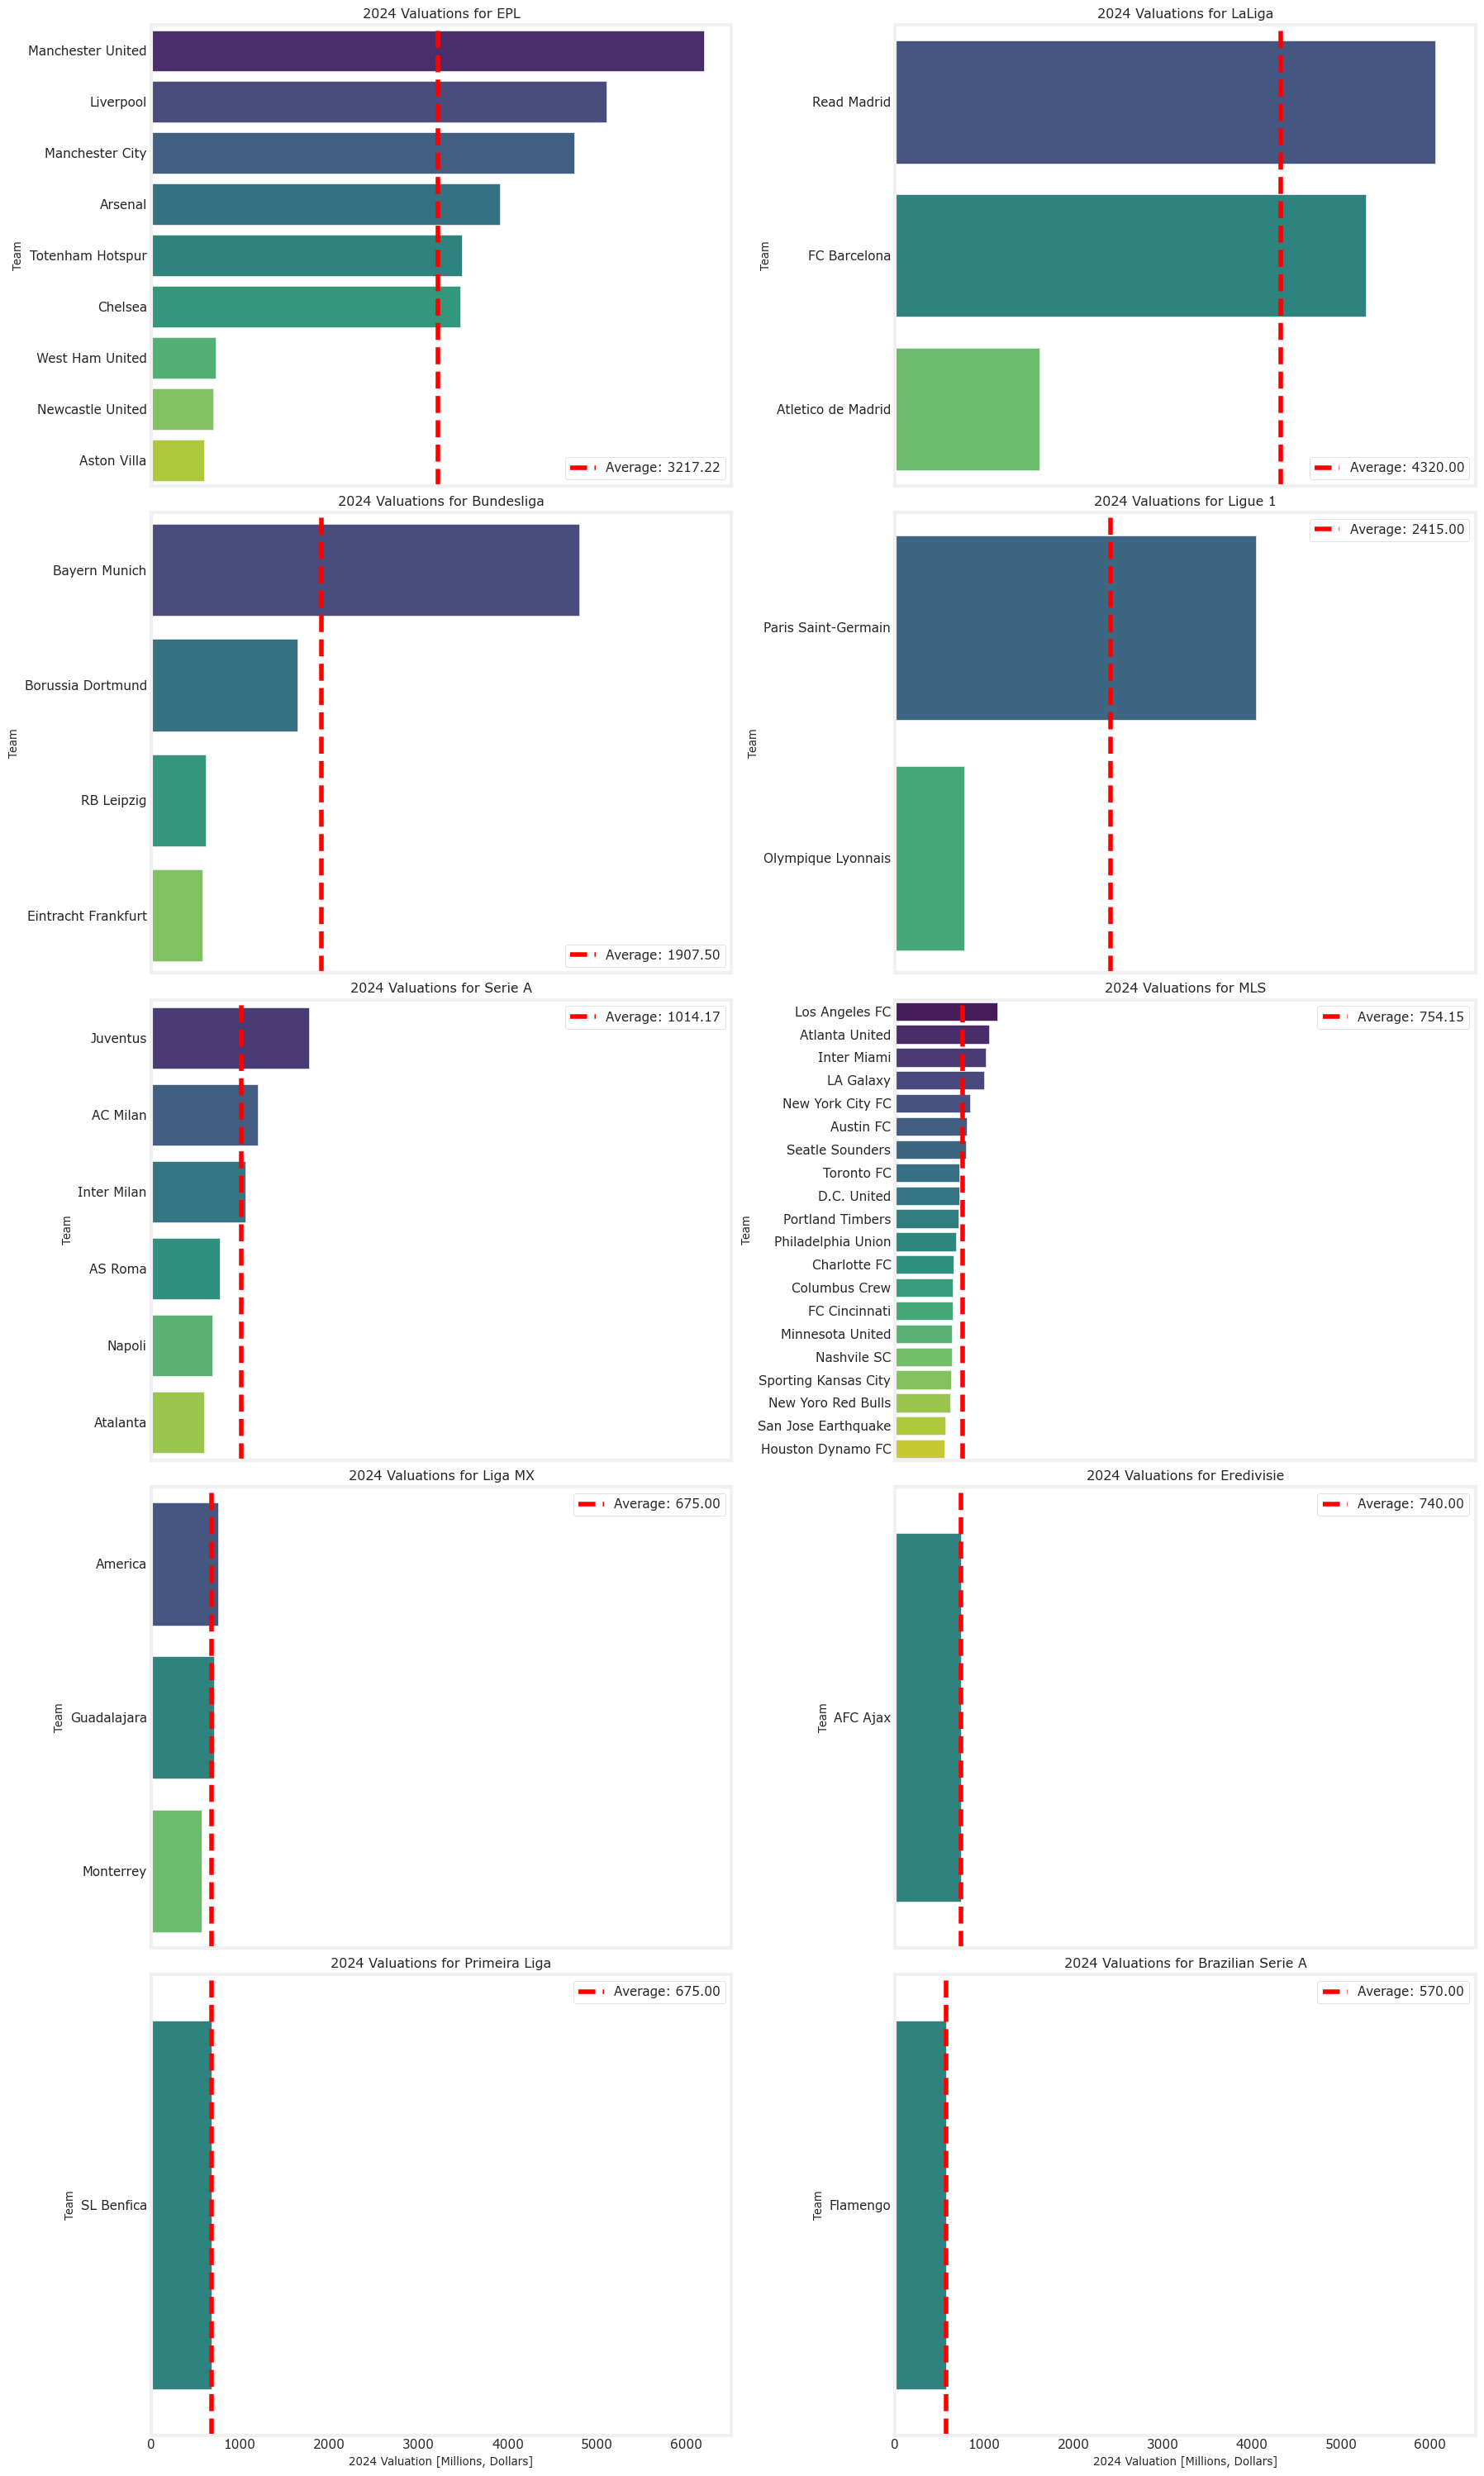

In [65]:
# Create separate dataframes for each league
leagues = club_data_df["League"].unique()

league_dfs = {
    league: club_data_df[club_data_df["League"] == league]
    for league in leagues
} # Dictionary of individual league data frame - Check the use of comprehension

# Initialize the subplot grid
fig, axes = plt.subplots(5, 2, figsize=(18, 30), sharex=True)
axes = axes.flatten()

# Create a horizontal bar plot for each league using seaborn
for i, (league, df) in enumerate(league_dfs.items()): # This is so cool
    sns.barplot(
        x="2024 Valuation [Millions, Dollars]",
        y="Team",
        data=df,
        ax=axes[i],
        palette="viridis",
    )
    axes[i].set_title(f"2024 Valuations for {league}")
    axes[i].set_xlabel("2024 Valuation [Millions, Dollars]")
    axes[i].set_ylabel("Team")

    # Add an average marker for each league
    avg_valuation = df["2024 Valuation [Millions, Dollars]"].mean()
    axes[i].axvline(
        avg_valuation,
        color="red",
        linestyle="--",
        label=f"Average: {avg_valuation:.2f}",
    )
    axes[i].legend()

# Hide any unused subplots - THIS IS A COOL FEATURE I DISCOVERED WHILE WORKING ON THIS NOTEBOOK
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

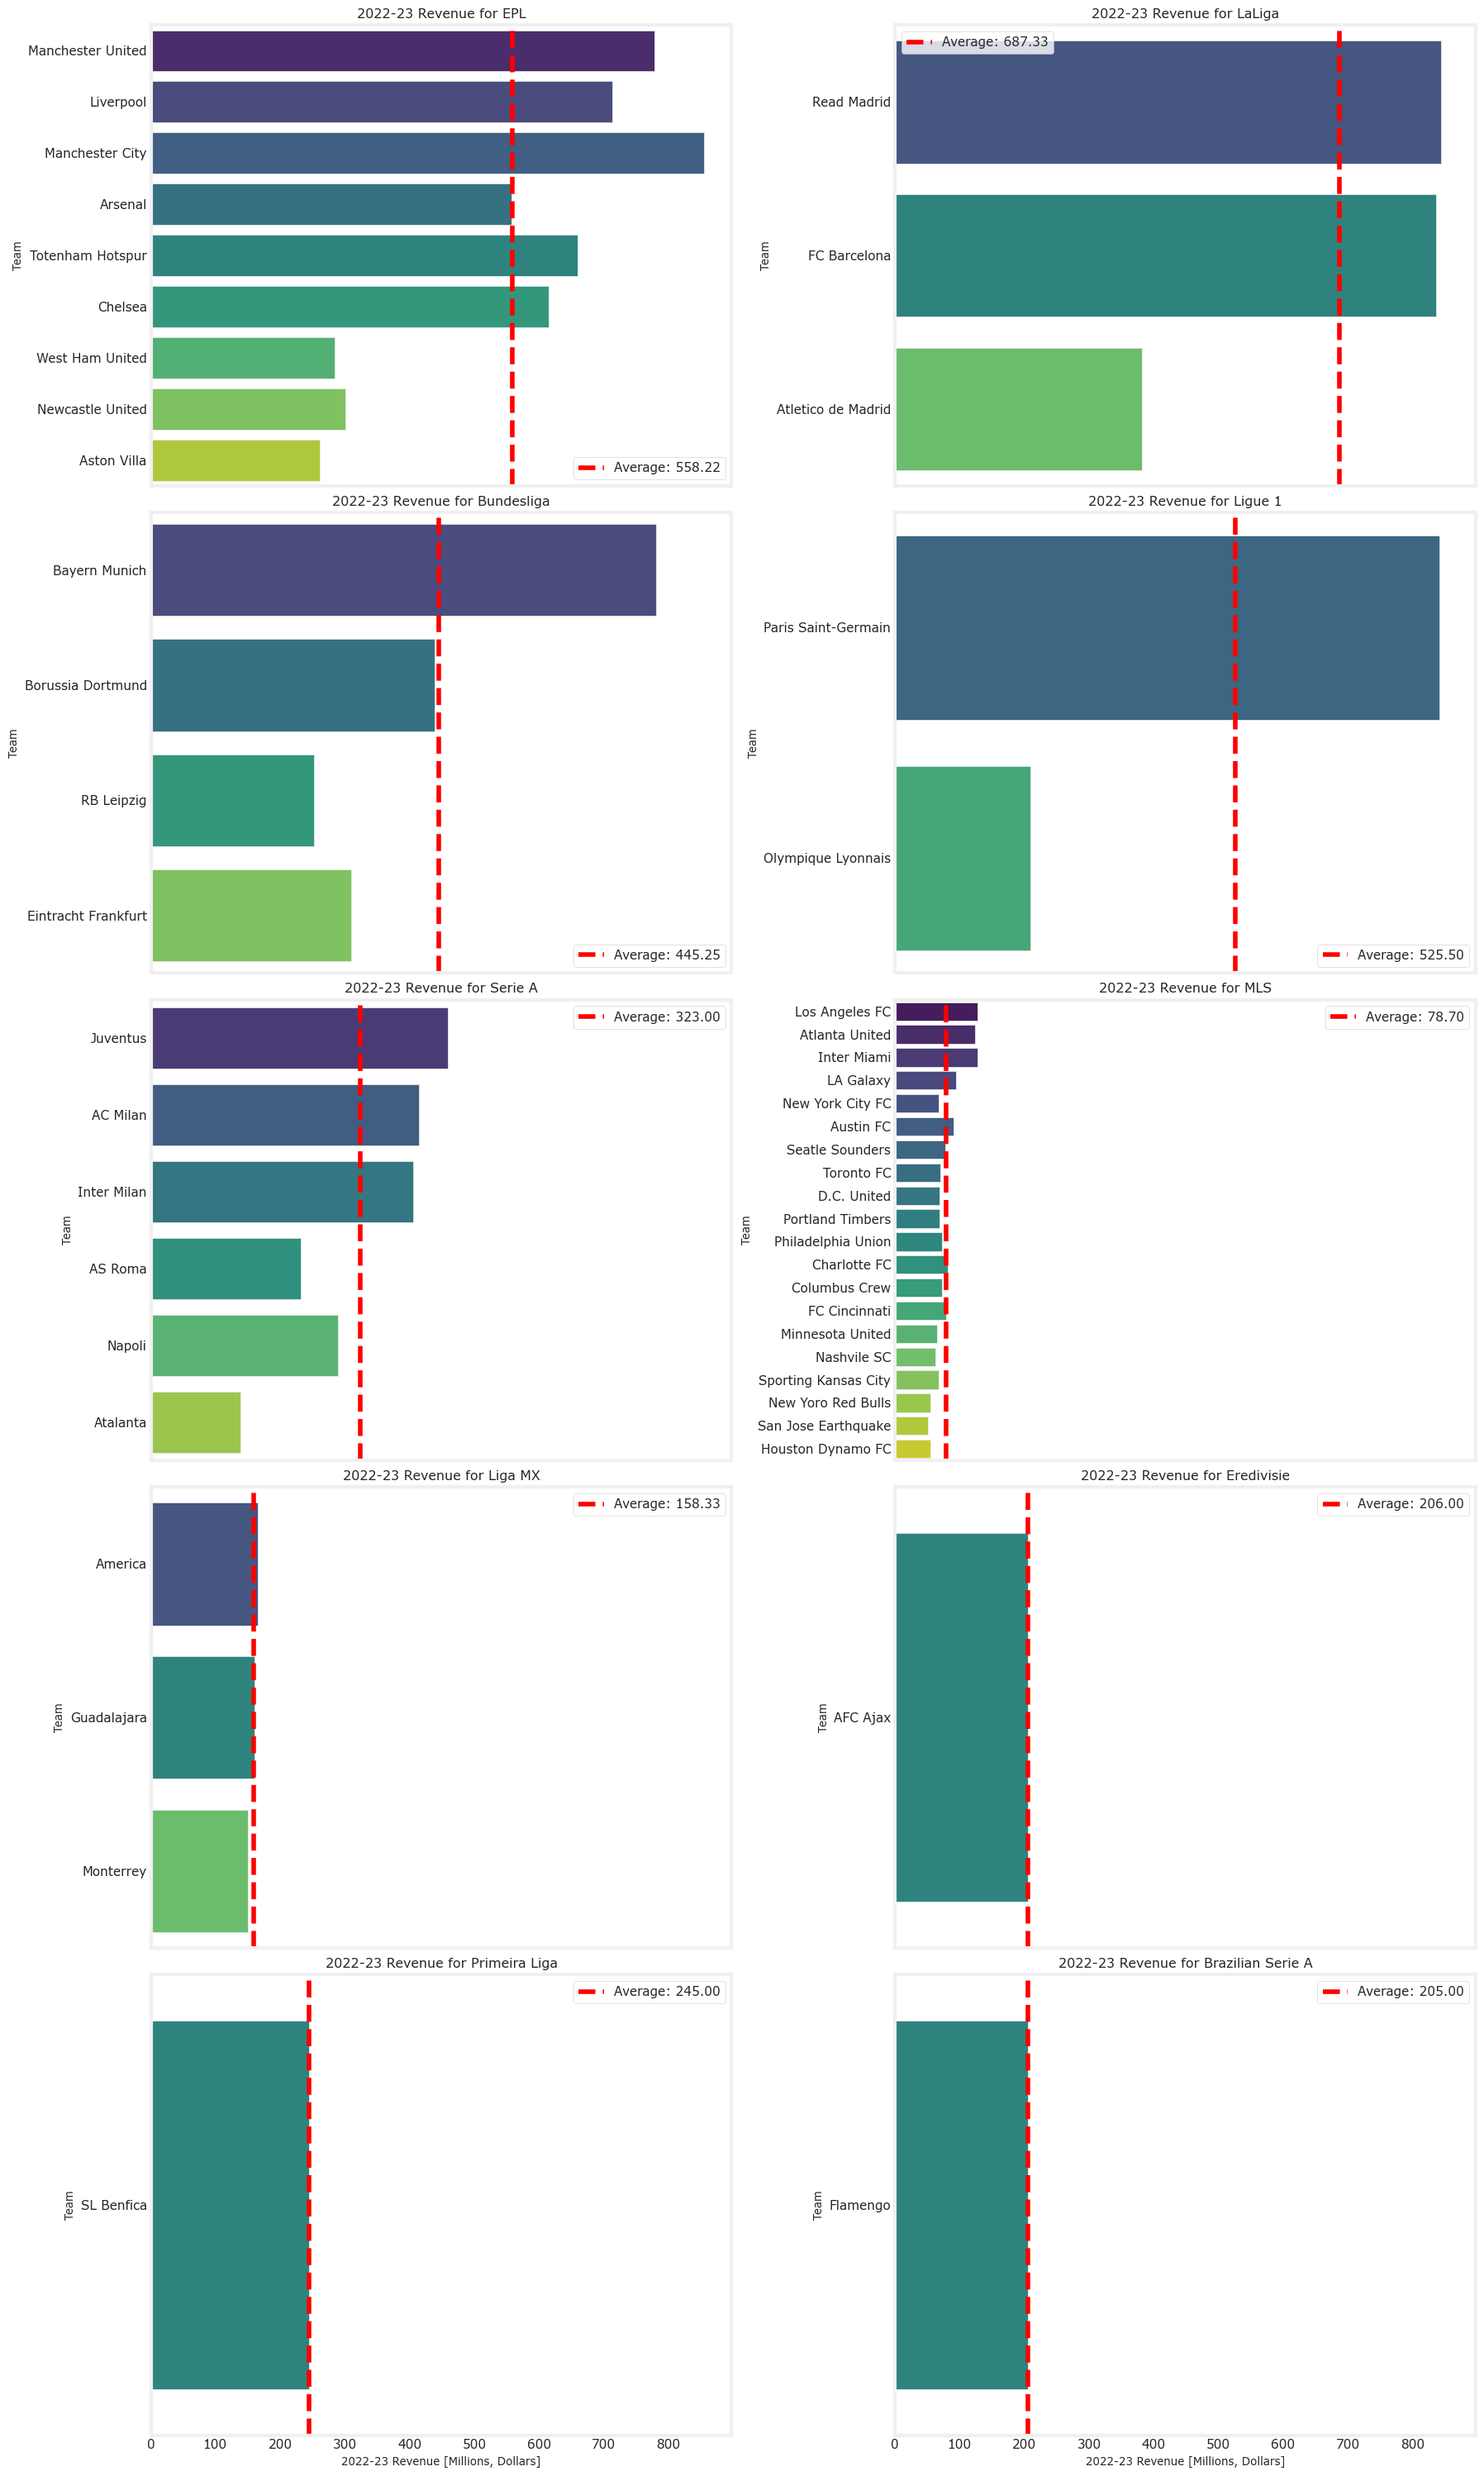

In [66]:
# Plot Revenue 2022 -23
# Initialize the subplot grid
fig, axes = plt.subplots(5, 2, figsize=(18, 30), sharex=True)
axes = axes.flatten()

# Create a horizontal bar plot for each league using seaborn
for i, (league, df) in enumerate(league_dfs.items()):
    sns.barplot(
        x="2022-23 Revenue [Millions, Dollars]", # Note target column change from the function above
        y="Team",
        data=df,
        ax=axes[i],
        palette="viridis",
    )
    axes[i].set_title(f"2022-23 Revenue for {league}") # Changed title and labels
    axes[i].set_xlabel("2022-23 Revenue [Millions, Dollars]")
    axes[i].set_ylabel("Team")

    # Add an average marker for each league
    avg_revenue = df[
        "2022-23 Revenue [Millions, Dollars]"
    ].mean()  # Changed target column and variable name
    axes[i].axvline(
        avg_revenue,
        color="red",
        linestyle="--",
        label=f"Average: {avg_revenue:.2f}",
    )
    axes[i].legend()

# Hide any unused subplots - THIS IS A COOL FEATURE I DISCOVERED WHILE WORKING ON THIS NOTEBOOK
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Plotting average Valuation and Revenue for all leagues for comparison

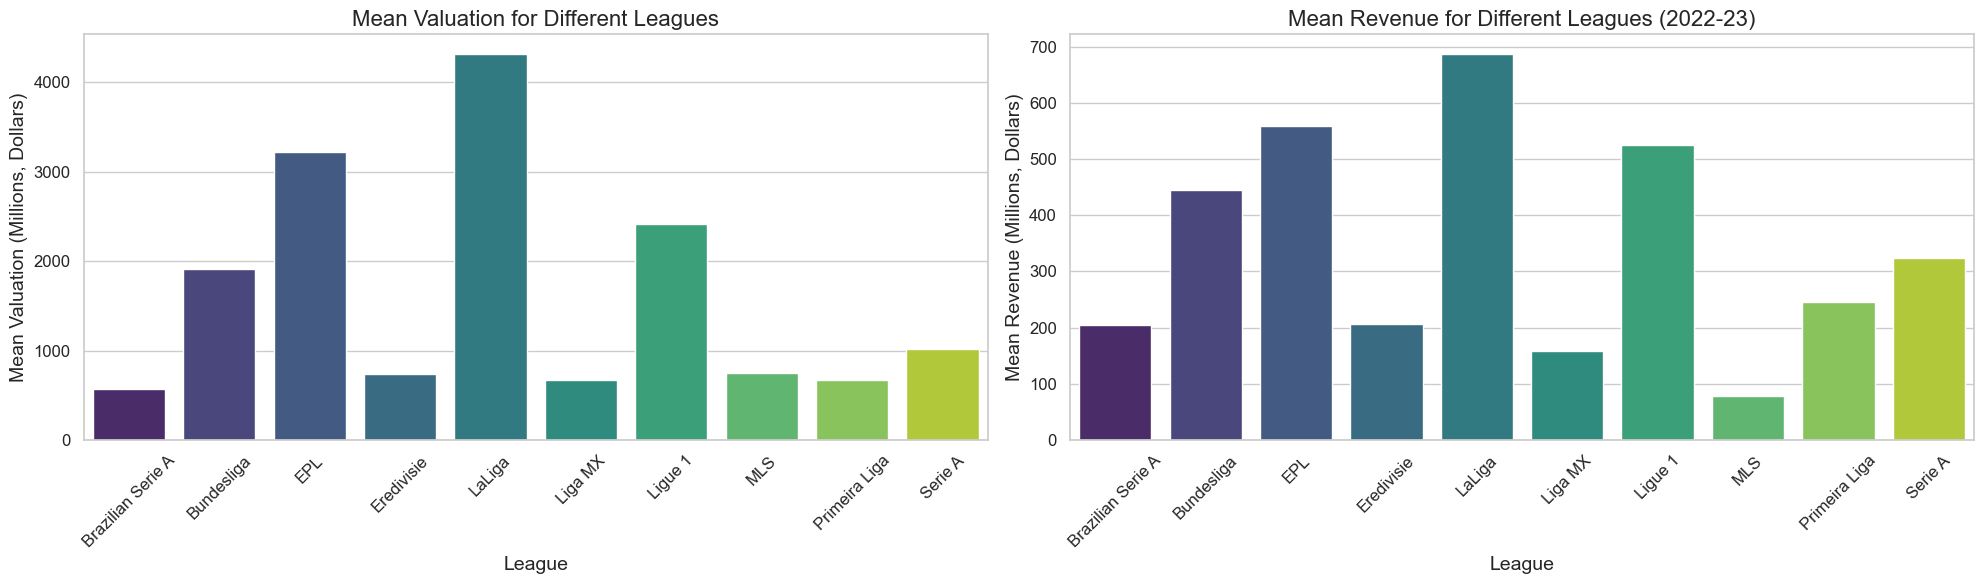

In [67]:
# Set the style for the plot
sns.set(style="whitegrid")

# Initialize the subplot grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axes = axes.flatten()


mean_valuations = club_data_df.groupby("League")[
    "2024 Valuation [Millions, Dollars]"
].mean()

mean_revenues = club_data_df.groupby("League")[
    "2022-23 Revenue [Millions, Dollars]"
].mean()

# Plot mean valuation
sns.barplot(
    ax=axes[0], x=mean_valuations.index, y=mean_valuations.values, palette="viridis"
)
axes[0].set_title("Mean Valuation for Different Leagues", fontsize=16)
axes[0].set_xlabel("League", fontsize=14)
axes[0].set_ylabel("Mean Valuation (Millions, Dollars)", fontsize=14)
axes[0].tick_params(axis="x", rotation=45, labelsize=12)
axes[0].tick_params(axis="y", labelsize=12)

# Plot mean revenue
sns.barplot(
    ax=axes[1], x=mean_revenues.index, y=mean_revenues.values, palette="viridis"
)
axes[1].set_title("Mean Revenue for Different Leagues (2022-23)", fontsize=16)
axes[1].set_xlabel("League", fontsize=14)
axes[1].set_ylabel("Mean Revenue (Millions, Dollars)", fontsize=14)
axes[1].tick_params(axis="x", rotation=45, labelsize=12)
axes[1].tick_params(axis="y", labelsize=12)

plt.tight_layout()
plt.show()

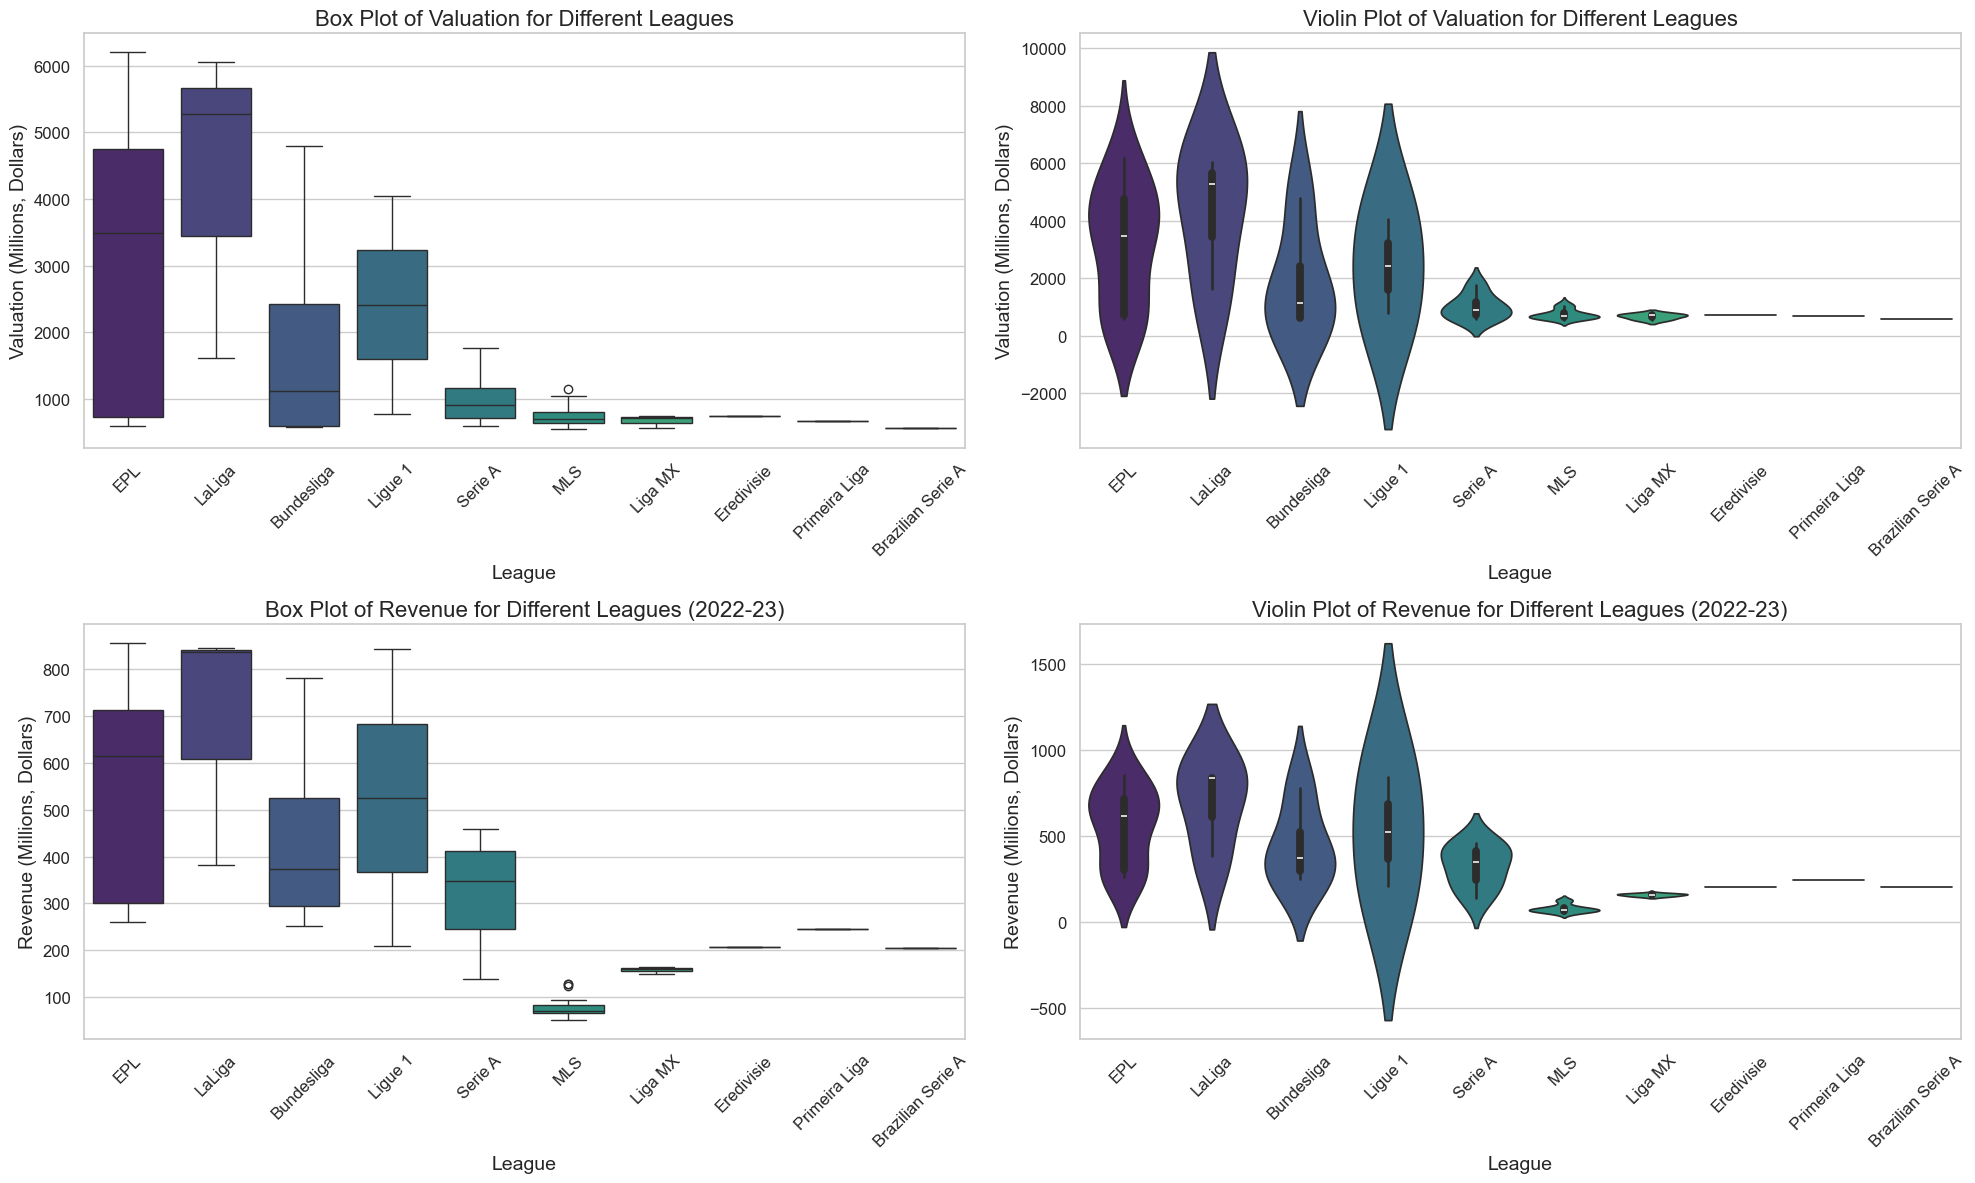

In [68]:
# Create a subplot with box plot and violin plot for valuations and revenues

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

# Box plot for valuations
sns.boxplot(
    ax=axes[0, 0],
    data=club_data_df,
    x="League",
    y="2024 Valuation [Millions, Dollars]",
    palette="viridis",
)
axes[0, 0].set_title("Box Plot of Valuation for Different Leagues", fontsize=16)
axes[0, 0].set_xlabel("League", fontsize=14)
axes[0, 0].set_ylabel("Valuation (Millions, Dollars)", fontsize=14)
axes[0, 0].tick_params(axis="x", rotation=45, labelsize=12)
axes[0, 0].tick_params(axis="y", labelsize=12)

# Violin plot for valuations
sns.violinplot(
    ax=axes[0, 1],
    data=club_data_df,
    x="League",
    y="2024 Valuation [Millions, Dollars]",
    palette="viridis",
)
axes[0, 1].set_title("Violin Plot of Valuation for Different Leagues", fontsize=16)
axes[0, 1].set_xlabel("League", fontsize=14)
axes[0, 1].set_ylabel("Valuation (Millions, Dollars)", fontsize=14)
axes[0, 1].tick_params(axis="x", rotation=45, labelsize=12)
axes[0, 1].tick_params(axis="y", labelsize=12)

# Box plot for revenues
sns.boxplot(
    ax=axes[1, 0],
    data=club_data_df,
    x="League",
    y="2022-23 Revenue [Millions, Dollars]",
    palette="viridis",
)
axes[1, 0].set_title("Box Plot of Revenue for Different Leagues (2022-23)", fontsize=16)
axes[1, 0].set_xlabel("League", fontsize=14)
axes[1, 0].set_ylabel("Revenue (Millions, Dollars)", fontsize=14)
axes[1, 0].tick_params(axis="x", rotation=45, labelsize=12)
axes[1, 0].tick_params(axis="y", labelsize=12)

# Violin plot for revenues
sns.violinplot(
    ax=axes[1, 1],
    data=club_data_df,
    x="League",
    y="2022-23 Revenue [Millions, Dollars]",
    palette="viridis",
)
axes[1, 1].set_title(
    "Violin Plot of Revenue for Different Leagues (2022-23)", fontsize=16
)
axes[1, 1].set_xlabel("League", fontsize=14)
axes[1, 1].set_ylabel("Revenue (Millions, Dollars)", fontsize=14)
axes[1, 1].tick_params(axis="x", rotation=45, labelsize=12)
axes[1, 1].tick_params(axis="y", labelsize=12)

plt.tight_layout()
plt.show()

In [69]:
# Crea# Add a new column 'Confederation' based on the league
confederation_mapping = {
    "EPL": "UEFA",
    "LaLiga": "UEFA",
    "Bundesliga": "UEFA",
    "Eredivisie": "UEFA",
    "Ligue 1": "UEFA",
    "Primeira Liga": "UEFA",
    "Serie A": "UEFA",
    "MLS": "CONCACAF",
    "Liga MX": "CONCACAF",
    "Brazilian Serie A": "CONMEBOL",
}

club_data_df["Confederation"] = club_data_df["League"].map(
    confederation_mapping
)

club_data_df.head()

,Rank,Team,"2024 Valuation [Millions, Dollars]","2022-23 Revenue [Millions, Dollars]",League,Confederation
0,1,Manchester United,6200,778,EPL,UEFA
1,2,Read Madrid,6060,844,LaLiga,UEFA
2,3,FC Barcelona,5280,836,LaLiga,UEFA
3,4,Liverpool,5110,713,EPL,UEFA
4,5,Bayern Munich,4800,781,Bundesliga,UEFA


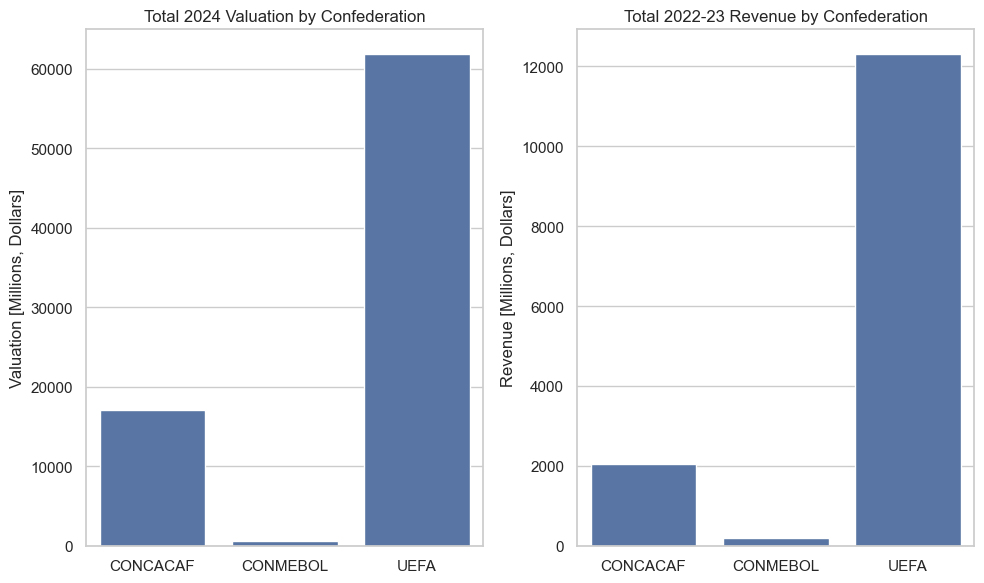

In [70]:
# Group by Confederation to get the total revenue and valuation
confederation_summary = (
    club_data_df.groupby("Confederation")[
        ["2024 Valuation [Millions, Dollars]", "2022-23 Revenue [Millions, Dollars]"]
    ]
    .sum()
    .reset_index()
)
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot total valuation by confederation
sns.barplot(
    data=confederation_summary,
    x="Confederation",
    y="2024 Valuation [Millions, Dollars]",
    ax=axes[0],
)
axes[0].set_title("Total 2024 Valuation by Confederation")
axes[0].set_ylabel("Valuation [Millions, Dollars]")
axes[0].set_xlabel("")

# Plot total revenue by confederation
sns.barplot(
    data=confederation_summary,
    x="Confederation",
    y="2022-23 Revenue [Millions, Dollars]",
    ax=axes[1],
)
axes[1].set_title("Total 2022-23 Revenue by Confederation")
axes[1].set_ylabel("Revenue [Millions, Dollars]")
axes[1].set_xlabel("")


# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()